In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("C:/Users/user/Downloads/archive/bank.csv")
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
dataset.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11157    False
11158    False
11159    False
11160    False
11161    False
Length: 11162, dtype: bool

In [6]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


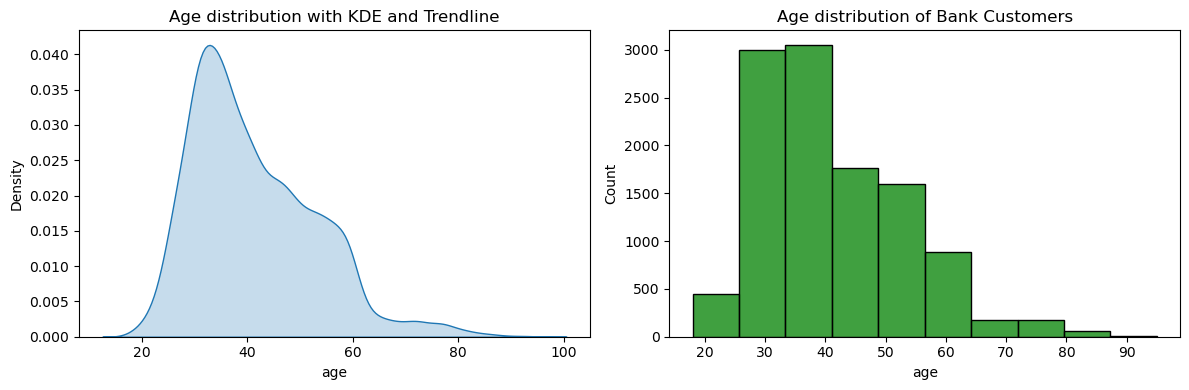

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4)) 
sns.kdeplot(dataset['age'], fill=True, label='KDE Plot', ax=axes[0])
axes[0].set_title('Age distribution with KDE and Trendline')
sns.histplot(dataset['age'], bins=10, color='green', ax=axes[1])
axes[1].set_title('Age distribution of Bank Customers')

# Adjust the space between subplots
plt.tight_layout()

# Display the plots
plt.show()

This shows that customers in the database are predominatly in thier forties or younger

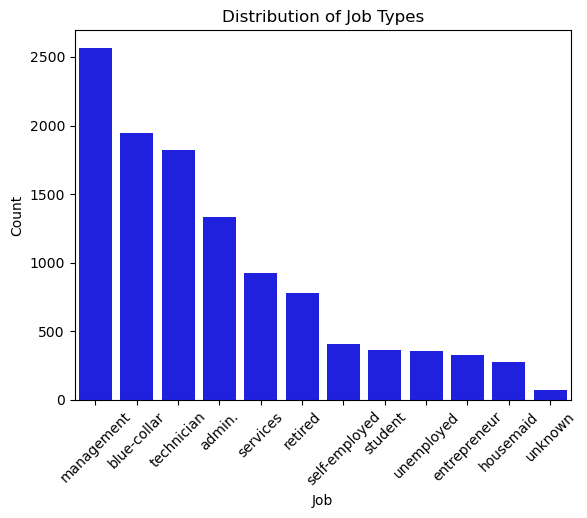

In [8]:
count = dataset['job'].value_counts()

# Create a bar plot
sns.barplot(x=count.index, y=count, color = 'blue')

# Optionally, you can rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Set labels and title
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Distribution of Job Types')

plt.show()

This shows that customers are predominatly In Management, Blue-collar Technicians or Admins

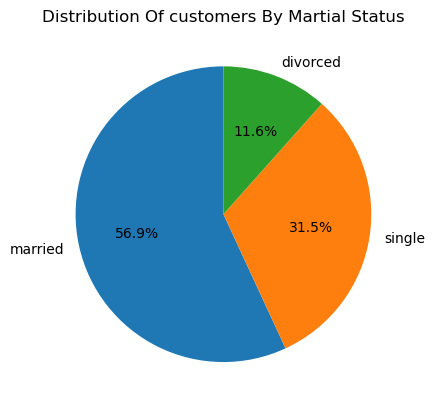

In [9]:
marital_count = dataset['marital'].value_counts()
plt.pie(x = marital_count, labels = marital_count.index,autopct='%1.1f%%', startangle =90)
plt.title('Distribution Of customers By Martial Status')
plt.show()

This Shows that a greater portion of the customer base is married

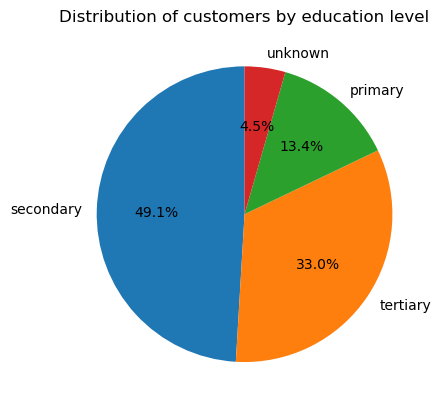

In [10]:
education_count = dataset['education'].value_counts()
plt.pie(x = education_count, labels = education_count.index, autopct ='%1.1f%%', startangle=90)
plt.title('Distribution of customers by education level')
plt.show()

Only 33% of customers have attended a tertiary institution, 49.1% have attended secondary schools and 13.4% have only attended primary school. 

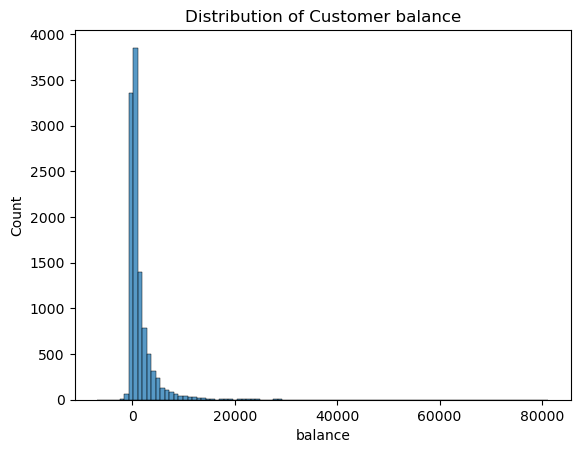

In [11]:
sns.histplot(dataset['balance'], bins = 100)
plt.title('Distribution of Customer balance')
plt.show()

Customers have Balances ranging from negative to 81,000 in their bank accounts

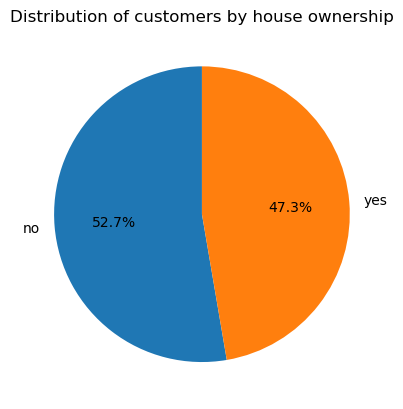

In [12]:
housing_count = dataset['housing'].value_counts()
plt.pie(x = housing_count, labels = housing_count.index, autopct ='%1.1f%%', startangle=90)
plt.title('Distribution of customers by house ownership')
plt.show()

More customers do not own houses 

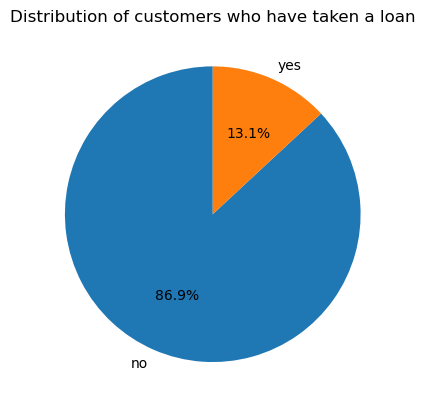

In [13]:
loan_count = dataset['loan'].value_counts()
plt.pie(x = loan_count, labels = loan_count.index, autopct ='%1.1f%%', startangle=90)
plt.title('Distribution of customers who have taken a loan')
plt.show()

86.9% of customers have not taken any loans previously

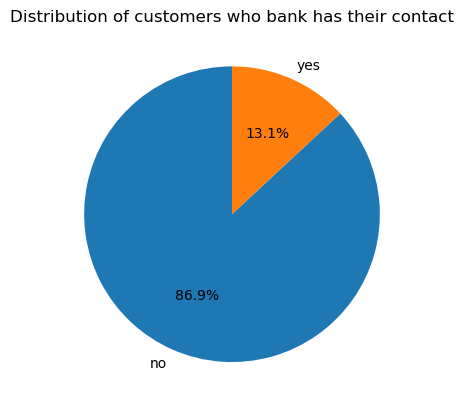

In [14]:
contact = dataset['contact'].value_counts()
plt.pie(x = loan_count, labels = loan_count.index, autopct ='%1.1f%%', startangle=90)
plt.title('Distribution of customers who bank has their contact')
plt.show()

Bank has only 13.1% of customers contact 

Feature Engineering

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

categorical_columns = ['job', 'marital', 'education', 'housing', 'loan', 'contact']

for column in categorical_columns:
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])
    label_encoders[column] = le

In [21]:
dataset.drop(['default', 'day', 'month', 'poutcome', 'deposit'], inplace = True, axis = 1)